### Assignment 2, Question 1
#### Devon Richtsmeier

### 1. Choose a logistic regression for a multiclass classification using MNIST data.

#### In this problem, we are interested in looking at Modified National Institute of Standards and Technology (MNIST) dataset. The dataset set consists of thousands of 28x28 images of hand written numbers from 0 to 9. It can be useful to develop a model for number recognition from handwritten notes, forms, etc. as it would make the data input process for large amounts of such documents much more efficient, and take much less time than having to input the data by hand. Here, we are looking at reshaping the 28x28 images to single vectors with 784 elements in order to use more simple models. Specifically, in this problem we will invesigate Logistic Regression for multiclass classification. Of course there are 10 classes, the digits 0-9 that we would like to distinguish between based on the pixels values of 784 pixels.

#### Below we can see examples from the MNIST dataset of each of the handwritten digits.

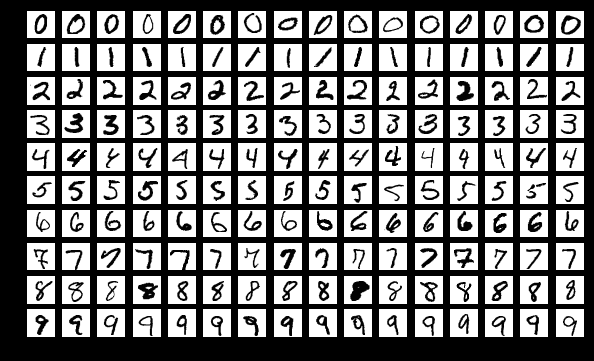
https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png

#### First we'll load the packages we'll need to do our Logistic Regression, specifically the LogisticRegression model, as well as other packages for storing, handling, and manipulating our data.

In [14]:
# Load the appropriate packages

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Set the style for plots going forward to be a white background with a grid.
sns.set_style('whitegrid')

# Print when all packages are loaded and ready to continue.
print('Packages loaded.')

Packages loaded.


### a. Do not use PCA. To make images noisy, use different c_noise. Choose a set n_noise = [0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50]. Train the model for each n_noise. Find corresponding accuracy (use, for example, metrics.accuracy_score(pred_va, tar_va)). Plot:  accouracy  vs. n_noise.

#### Now, not only do we want to train the model to recognize various digits between 0 and 9, we also want to see how much noise our model can handle before its performance becomes unacceptable. This is because documents which we'd be potentially trying to read would need to be scanned in some manner, which could introduce noise, or the ink or lead could become smudged, making the digits less readable. So seeing how well our model performs with various levels of noise is important.

### Now we'll load the MNIST data from tensorflow, which is already separated into the the input and target sets for training and validation. We'll concatenate the two target sets to obtain a single target set. This is so we can define our training and validation sets later on with a specific percentage of the full data set.

In [15]:
# Get the MNIST data 
from tensorflow.keras.datasets import mnist

# Define the input and target sets for both and normalizing the input
(input_tr, target_tr), (input_va, target_va) = mnist.load_data()

# Reshape the data from images into vectors
input_tr = np.reshape(input_tr, (-1,784)) 
input_va = np.reshape(input_va, (-1,784))

print('The shape of the input training set is: ', np.shape(input_tr))
print('The shape of the input validation set is: ', np.shape(input_va))

# Combine the target training and validation sets to single large set.
tarT = np.concatenate((target_tr, target_va))

print('The shape of the concatenated target training and validation set is: ', np.shape(tarT))

The shape of the input training set is:  (60000, 784)
The shape of the input validation set is:  (10000, 784)
The shape of the concatenated target training and validation set is:  (70000,)


#### Once we have the full target data set we need to add various levels of noise to our input set and then normalize. So we can define a number of levels of peak noise to multiply to a randomized array of values between 0 and 1 that are the same shapes as the initial training and validation sets. Then we can iterate through noise levels, apply it to our input set and fit the model at each level of noise. Then we'll calculate an accuracy score of our model between the predicted values and the target values. For this iteration we will be using all of the input features (pixels) to predict, i.e. we won't be using any principal component analysis (PCA).

In [16]:
# The various noise levels to add to the MNIST data
n_noise = np.array([0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50])

# Set the baseline noise arrays (not yet scaled by the n_noise values)
# These arrays are set between 0 and 1 to begin with and will remain the same throughout the for loop iterations
noise_train = np.random.rand(60000, 784)
noise_valid = np.random.rand(10000, 784)

# Initialize two arrays to hold the accuracy score for each level of n_noise for the training and validation sets
acc_no_pca_tr = np.zeros(len(n_noise))
acc_no_pca_va = np.zeros(len(n_noise))

# For loop to iterate through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set in order to not continue to add 
    # noise on top of each noise level that preceded. Also divide by 255 in order to normalize
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize to the level of noise
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets similar to the way we combined the target sets
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    print('The shape of the concatenated input training and validation set is: ', np.shape(inpT))
    
    # Split the data into training and test sets with a test size of 30%
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Set up the logistic regressor with L2 regularization
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr)
    pred_va = log_reg.predict(inp_va)
    
    # Find the accuracy score of the metric for the training and validation sets
    acc_no_pca_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_no_pca_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)

The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.4s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.1s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.1s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s finished


### Once we have iterated through the various levels of noise, we can plot the accuracy score vs. the level of noise in order to determine what levels of noise would be acceptable for our model.

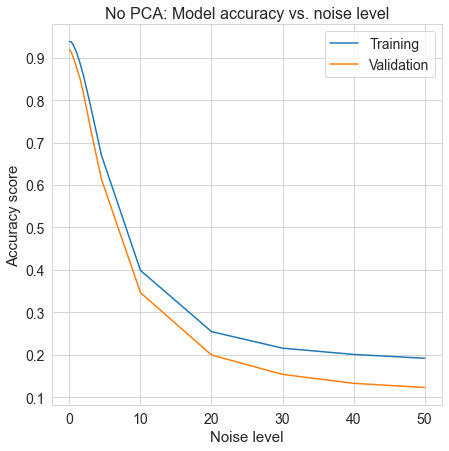

In [17]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_no_pca = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_no_pca_tr)
plt.plot(n_noise, acc_no_pca_va)
plt.title('No PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'], fontsize=14)
plt.show()

#### As expected, when we add noise, the model immediately becomes less accurate, with the model predicting the validation set slightly worse than the training. This is, of course, expected since the model is trained on the training set so is able to predict it more accurately. 

### b. Do the same step above; however, use a fixed PCA (n_component=100) this time. Plot accuracy vs. n_noise on the same plot.

#### Often, we don't want to take a long time to train a model so we can use PCA on the data first to find the combinations, or components, of the features that best describe the data without using all of the features. In this section we will be doing exactly what did before in terms of adding increasing levels of noise to the data and calculating the accuracy of the model. However, in addition to that, we will first be using PCA on our input data at each setp to obtain the first 100 principal components, which we will then feed into our model.

In [18]:
# Initialize two arrays to hold the accuracy score for each level of n_noise, this time with PCA with 100 components
acc_with_pca100_tr = np.zeros(len(n_noise))
acc_with_pca100_va = np.zeros(len(n_noise))

# For loop to iterate through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set in order to not continue to add 
    # noise on top of each noise level that preceded. Also divide by 255 in order to normalize
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize to the level of noise
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets as we did before
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    # Print the noise level and shape of input set
    print('Noise level:', c_noise)
    print('The shape of the concatenated input training and validation set is: ', np.shape(inpT))
    print()
    
    # Split the data into training and test, with 30% for the test set
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Initialize the PCA transformer with n_components = 100
    pca = PCA(n_components=100)

    # Find the first 100 principal components of the data
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr_pca, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr_pca)
    pred_va = log_reg.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca100_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_with_pca100_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)

Noise level: 0.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


Noise level: 0.25
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


Noise level: 0.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


Noise level: 1.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


Noise level: 1.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Noise level: 2.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Noise level: 3.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Noise level: 4.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


Noise level: 10.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


Noise level: 20.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Noise level: 30.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Noise level: 40.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Noise level: 50.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


### Once we have iterated through the various levels of noise, we can plot the accuracy score vs. the level of noise in order to determine what levels of noise would be acceptable for our model when we've used 100 principal components.

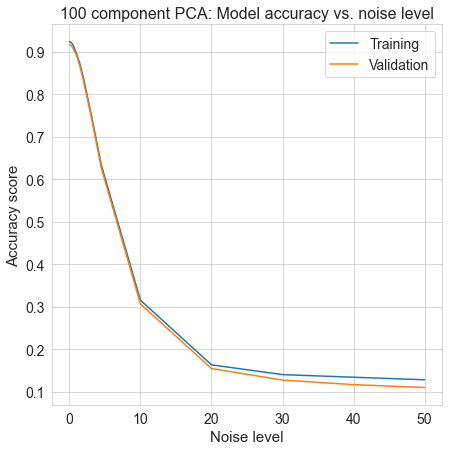

In [19]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca100 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca100_tr)
plt.plot(n_noise, acc_with_pca100_va)
plt.title('100 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'], fontsize=14)
plt.show()

#### With 100 principal components, we see better agreement with between the training and validation that we did without PCA. But we also see slightly less accuracy in the training and validation sets to the same sets without PCA. The better agreement between these two sets could be because we are not using the full data set so we aren't overfitting the training data, allowing the model to more accurately predict the validation set. But not using all of the data lowers the accuracy.

### c. Do the same above with PCA (n_components=20).

### Now we will do the same thing we did with 100 principal components, except now we'll fit with 20 principal components.

In [20]:
# Initialize two arrays to hold the accuracy score for each level of n_noise, this time with PCA with 20 components
acc_with_pca20_tr = np.zeros(len(n_noise))
acc_with_pca20_va = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale appropriately again
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize to the noise
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets as we did above
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    # Print the noise level and shape of input set
    print('Noise level:', c_noise)
    print('The shape of the concatenated input training and validation set is: ', np.shape(inpT))
    print()
    
    # Split the data into training and test, 30% for test
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Initialize the PCA transformer with n_components = 20
    pca = PCA(n_components=20)

    # Find the 20 principal components
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr_pca, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr_pca)
    pred_va = log_reg.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca20_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_with_pca20_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)

Noise level: 0.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Noise level: 0.25
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


Noise level: 0.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


Noise level: 1.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


Noise level: 1.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


Noise level: 2.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


Noise level: 3.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


Noise level: 4.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


Noise level: 10.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Noise level: 20.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Noise level: 30.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Noise level: 40.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Noise level: 50.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


### Again, now we'll plot the accuracy score vs. the level of noise for 20 principal components.

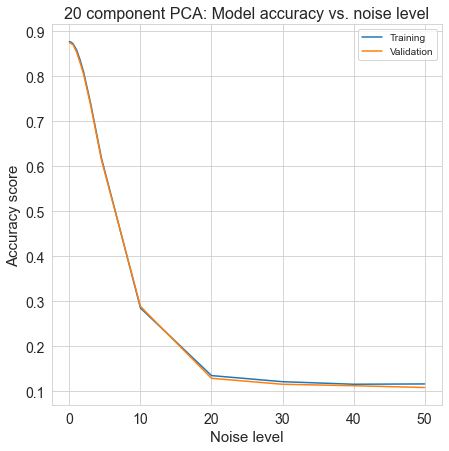

In [21]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca20 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca20_tr)
plt.plot(n_noise, acc_with_pca20_va)
plt.title('20 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'])
plt.show()

#### With 20 principal components, we again see good agreement between the training and validation sets. But we also see slightly less accuracy in the training and validation sets than we did with 100 principal components. Again, this is due to the fact that we're using less data in the model, so while it's faster at fitting the data potentially, it won't be as accurate.

### d. Now we'll plot all three curves and discuss/explain what you see in the plot. 

#### We'll look at the differences between the training sets, the validation sets, and the differences between the training and validation sets for each of the three options we considered: no PCA, 100 principal components, and 20 principal components.

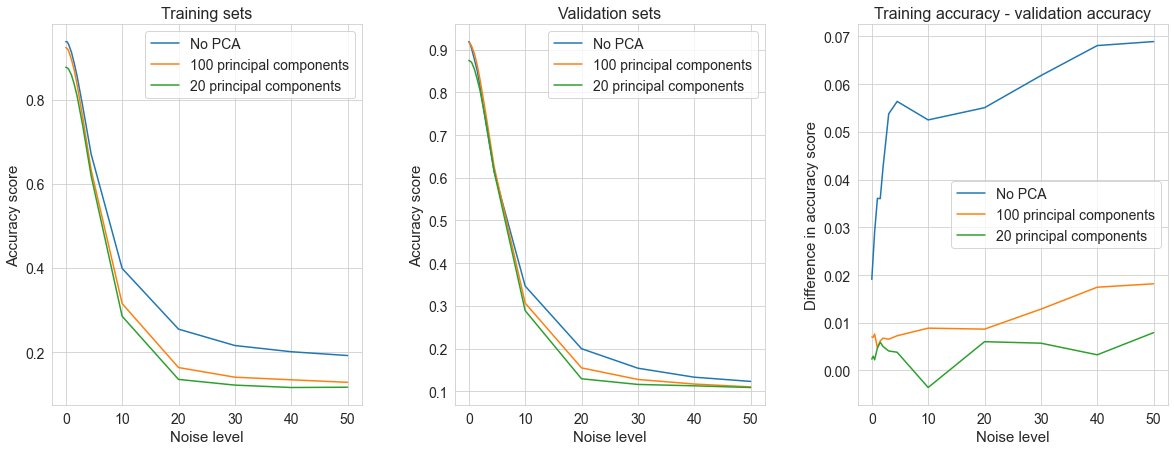

In [22]:
# Set up the figure with all 3 plots
fig_all, ax = plt.subplots(1, 3, figsize=(20, 7))

# Training sets
ax[0].plot(n_noise, acc_no_pca_tr)
ax[0].plot(n_noise, acc_with_pca100_tr)
ax[0].plot(n_noise, acc_with_pca20_tr)
ax[0].set_title('Training sets', fontsize=16)
ax[0].set_xlabel('Noise level', fontsize=15)
ax[0].set_ylabel('Accuracy score', fontsize=15)
ax[0].tick_params(labelsize=14)
ax[0].legend(['No PCA', '100 principal components', '20 principal components'], fontsize=14)

# Validation sets
ax[1].plot(n_noise, acc_no_pca_va)
ax[1].plot(n_noise, acc_with_pca100_va)
ax[1].plot(n_noise, acc_with_pca20_va)
ax[1].set_title('Validation sets', fontsize=16)
ax[1].set_xlabel('Noise level', fontsize=15)
ax[1].set_ylabel('Accuracy score', fontsize=15)
ax[1].tick_params(labelsize=14)
ax[1].legend(['No PCA', '100 principal components', '20 principal components'], fontsize=14)

# Differences between training and validation
ax[2].plot(n_noise, acc_no_pca_tr - acc_no_pca_va)
ax[2].plot(n_noise, acc_with_pca100_tr - acc_with_pca100_va)
ax[2].plot(n_noise, acc_with_pca20_tr - acc_with_pca20_va)
ax[2].set_title('Training accuracy - validation accuracy', fontsize=16)
ax[2].set_xlabel('Noise level', fontsize=15)
ax[2].set_ylabel('Difference in accuracy score', fontsize=15)
ax[2].tick_params(labelsize=14)
ax[2].legend(['No PCA', '100 principal components', '20 principal components'], fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

## Conclusion

### As we've already discussed above somewhat, we see accuracy scores fall when moving from no PCA to 100 principal components and finally to 20 principal components. This is due to the fact that we utilize less features in the data, meaning less information, and thus aren't able to predict the numbers as accurately. However, we do see some overfitting potentially with no PCA, so using PCA with more than 100 principal components, say 400, instead of the full number of features (784) could help with overfitting, while still giving us good accuracy. We see that using fewer principal components gives us better agreement between training and validation, supporting the fact that using all of the features can lead to overfitting. Additionally, finding a level of noise that is acceptable for the model is helpful in discerning which images fed into the model might be better to have a human look at.